<a href="https://colab.research.google.com/github/Sarvagy-Jain/Sampling-of-Imbalanced-DataSet-/blob/main/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
 
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/AnjulaMehto/Sampling_DataSet/main/Creditcard_data.csv'
df = pd.read_csv(url,index_col=0, on_bad_lines='skip')

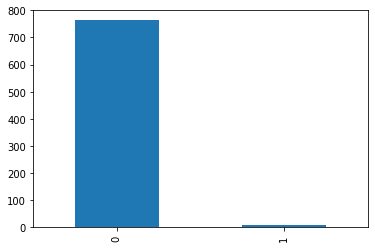

In [19]:
data = df
x = data.drop(['Class'],axis=1)
y = data['Class']
y.value_counts().plot(kind='bar');

In [4]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)
Sampled_data1 = pd.concat([x_rus,y_rus],axis =1)
Sampled_data1.shape

(18, 30)

In [5]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)
y_ros.value_counts()
Sampled_data2 = pd.concat([x_ros,y_ros],axis =1)
Sampled_data2.shape

(1526, 30)

In [6]:
# import library
from imblearn.under_sampling import TomekLinks
tl = RandomOverSampler(sampling_strategy='majority')
# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(x, y)
Sampled_data3 = pd.concat([x_tl,y_tl],axis =1)
Sampled_data3.shape

(1526, 30)

In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)
Sampled_data4 = pd.concat([x_smote,y_smote],axis =1)
Sampled_data4.shape

(1526, 30)

In [8]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x, y)
Sampled_data5 = pd.concat([x_nm,y_nm],axis =1)
Sampled_data5.shape

(18, 30)

In [9]:
SVM = SVC(kernel='linear') 
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
GS = GaussianNB()

In [25]:
from sklearn.metrics import accuracy_score

def getresult(data):
  X = data.drop('Class', axis=1)
  y = data['Class']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  li = [SVM,DTR,RFR,KNR,GS]
  d = []
  for i in li:
      i.fit(X_train,y_train)
      ypred = i.predict(X_test)
      d += [accuracy_score(y_test,ypred)] 
  return pd.Series(d)


In [26]:
print(getresult(Sampled_data3))

0    0.928105
1    0.993464
2    1.000000
3    0.973856
4    0.833333
dtype: float64


In [28]:
gettable = pd.concat([getresult(Sampled_data1),getresult(Sampled_data2),getresult(Sampled_data3),getresult(Sampled_data4),getresult(Sampled_data5)],axis=1)

In [29]:
a = pd.DataFrame(["Support Vector Machine","Decision-Tree -Classifier","RandomForestClassifier","KNeighborsClassifier","GaussianNB"])
gettable = pd.concat([a,gettable],axis=1) 
gettable.columns = ["Model/Sample","Random_Under_Sampling","Random_Over_Sampling","TomLinks","SMOTE","NearMiss"]

In [30]:
gettable

,Model/Sample,Random_Under_Sampling,Random_Over_Sampling,TomLinks,SMOTE,NearMiss
0,Support Vector Machine,0.75,0.928105,0.928105,0.928105,1.00
1,Decision-Tree -Classifier,0.50,0.993464,0.993464,0.973856,0.75
2,RandomForestClassifier,0.50,1.000000,1.000000,0.990196,0.75
3,KNeighborsClassifier,1.00,0.973856,0.973856,0.944444,1.00
4,GaussianNB,0.00,0.833333,0.833333,0.748366,1.00
